<a href="https://colab.research.google.com/github/mtofighi/Test/blob/master/avg_pop_polar_20k_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import random as r
import collections
import matplotlib.pyplot as plt

dh=0.42          # human diameter
rmin=10          # inner diameter
rmax=60          # outer diameter
tmin = 0         # teta 0 
tmax = 2*np.pi   # teta 360
social_d = 2     # social_distancing = 2 meter
radius_d = 0.5
pop = 20000     # Total population

itr = 2         # itereation

# distance function for polar coordinate
def dist(l1,l2):
  return np.sqrt(l1[0]**2 + l2[0]**2 - 2*l1[0]*l2[0]*np.cos(l1[1] - l2[1]))

def ci_calc(mtext,lsample):
  sigma = np.std(lsample)
  mean = np.mean(lsample)
  z= 1.96 #for CI = 95%
  error = z * (sigma/np.sqrt(len(lsample)))
  print(mtext,mean, "±" , error )

def iter_graph(title,llsample):
  plt.figure()
  ltemp = []
  for ii in range(len(llsample)):
    ltemp.append(np.mean(llsample[0:ii+1]))
  axes = plt.gca()
  #axes.set_ylim([0,pop])
  plt.title(title)
  plt.plot(np.arange(itr)+1,np.array(ltemp))

def polar_graph(human,l_r,l_t):
  l_r = np.array(l_r)
  l_t = np.array(l_t)
  area = dh*5
  colors = l_r
  fig = plt.figure(figsize=(20, 20), dpi=96)
  ax = fig.add_subplot(projection='polar')
  c = ax.scatter(l_t, l_r , s=area, cmap='hsv', alpha=1)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  #ax.grid(False)

25693
224662.0
19999.0
52.40625499556326
l_max_avg: 45.0
199990000
19999
Average contacts less than 2 m: 224662.0
Average unique individuals at leas than 2 m 19999.0
Average max contacts: 45.0
Nmumber of people in population:  20000
Number of experiment trials:  2
Avegrage unique contats:  19999.0 ± 0.0
Averag individual contacts:  22.4662 ± 0.0706823938474075
Minimum individual contacts:  0.0 ± 0.0
Maximum individual contacts::  45.0 ± 1.385929291125633


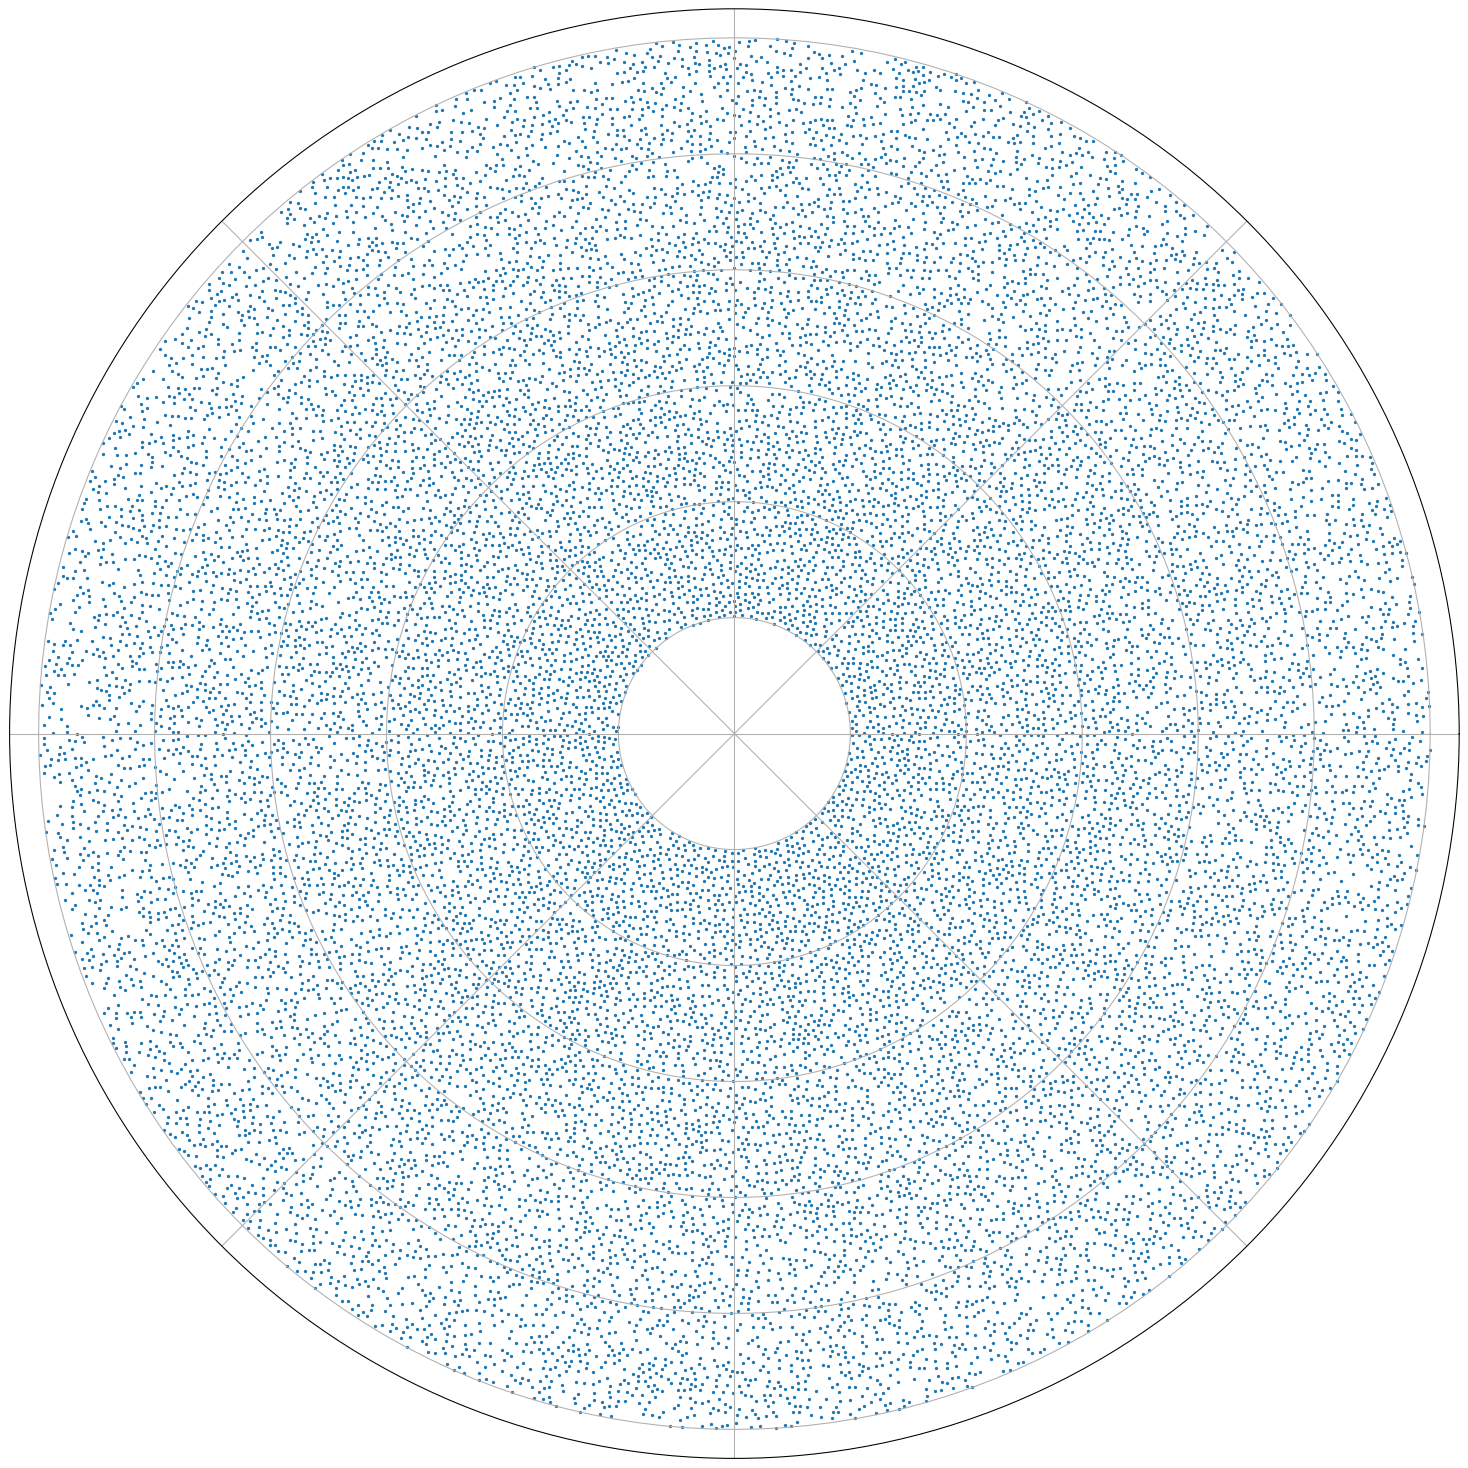

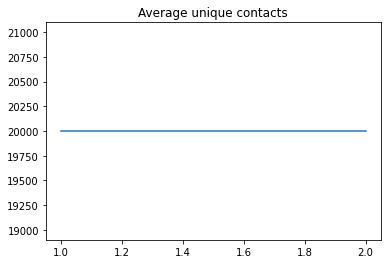

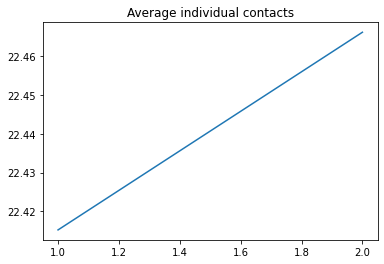

In [6]:
 l_c_t = []  # list of Total number of contacts  ?
 l_p_t = []  # list of pilgrims with at least one contact ?
 l_max = []  # list of Maximum contacts per individual ?

 avg_contacts_pop_l = []
 min_contacts_pop_l = []
 max_contacts_pop_l = []

 for k in range(itr):
  n_err=0
  l = list()
  c_total = 0
  l_d = []      # list of points (uniform distribution)
  l.append([r.uniform(rmin,rmax),r.uniform(tmin,tmax)])
  #l.append([r.randrange(rmin,rmax,4),r.uniform(tmin,tmax)])
  #rr = np.ceil(np.random.triangular(10,60, 60, 1)/radius_d)*radius_d
  #l.append([rr,r.uniform(tmin,tmax)])

  l_r = [l[0][0]]   #  list of R 
  l_t = [l[0][1]]   #  list of teta
  l_p = []          #  list of ???
  i=0

  while i < pop-1:
    new= [r.uniform(rmin,rmax),r.uniform(tmin,tmax)]
    #new= [r.randrange(rmin,rmax,4),r.uniform(tmin,tmax)]
    #rr = np.ceil(np.random.triangular(10,60, 60, 1)/radius_d)*radius_d
    #new= [rr,r.uniform(tmin,tmax)]

    c_temp = 0
    d_new = []
    l_p_temp=[]

    for j in range(len(l)):
      d = dist(l[j],new)
      if d<dh:
        new = []
        c_temp = 0
        d_new = []
        n_err= n_err+1
        break
      elif (d<social_d):
        c_temp = c_temp +1
        d_new.append(d)
        l_p_temp.append(j)
        l_p_temp.append(i)
      else:
        d_new.append(d)
    
    if (new):
      i+=1
      l.append(new)
      c_total = c_total + c_temp
      l_d.extend(d_new)
      l_p.extend(l_p_temp)
      l_r.append(new[0])
      l_t.append(new[1])
      
  l_c_t.append(c_total)
  l_p_t.append(len(set(l_p)))
  if (l_p):
    l_max.append(collections.Counter(l_p).most_common(1)[0][1])
    id_contact = collections.Counter(l_p).most_common()
    contacts = [x[1] for x in id_contact]
    if len(contacts)<pop:
      contacts.append(0)
    avg_contacts_pop_l.append(np.sum(contacts)/pop)
    min_contacts_pop_l.append(np.min(contacts))
    max_contacts_pop_l.append(np.max(contacts))
  else:
    l_max.append(-1)
    avg_contacts_pop_l.append(0)
    min_contacts_pop_l.append(0)
    max_contacts_pop_l.append(0)

print(n_err)
print(np.average(np.array(l_c_t)))
print(np.average(np.array(l_p_t)))
print(np.average(np.array(l_d)))
print("l_max_avg:", np.average(np.array(l_max)))
print(len(l_d))
print(len(set(l_p)))
print("Average contacts less than 2 m:", np.average(np.array(l_c_t)))
print("Average unique individuals at leas than 2 m", np.average(np.array(l_p_t)))
print("Average max contacts:", np.average(np.array(l_max)))

## Reporting 0.95 CI for populaion parameters based on samples
print("Nmumber of people in population: ",pop)
print("Number of experiment trials: ", len(l_p_t))
ci_calc("Avegrage unique contats: ",l_p_t)
ci_calc("Averag individual contacts: ",avg_contacts_pop_l)
ci_calc("Minimum individual contacts: ",min_contacts_pop_l)
ci_calc("Maximum individual contacts:: ",max_contacts_pop_l)

# Draw Polar Graph
polar_graph(dh,l_r,l_t)
iter_graph("Average unique contacts",l_p_t)
iter_graph("Average individual contacts",avg_contacts_pop_l)

In [ ]:
# 

id_contact = collections.Counter(l_p).most_common()
contacts = [x[1] for x in id_contact]
ci_calc("Averag of last contacts: ",contacts)

Averag of last contacts:  10.620324064812962 ± 0.06072621018388985


In [ ]:
id_contact = collections.Counter(l_p).most_common()
contacts = [x[1] for x in id_contact]
if len(contacts)<pop:
  contacts.append(0)
print(id_contact)
print(contacts)
avg_contacts_pop = np.sum(contacts)/pop
min_contacts_pop = np.min(contacts)
max_contacts_pop = np.max(contacts)
print("Contacts per individual: Min", min_contacts_pop, " Mean: ", avg_contacts_pop, " Max: ", max_contacts_pop)

[(47, 2), (57, 2), (59, 2), (36, 1), (44, 1), (4, 1), (19, 1), (83, 1), (89, 1)]
[2, 2, 2, 1, 1, 1, 1, 1, 1, 0]
Contacts per individual: Min 0  Mean:  0.12  Max:  2


In [ ]:
np.floor(np.random.triangular(10,60, 60, 10)/4)*4


array([32., 44., 32., 40., 48., 56., 16., 28., 28., 48.])

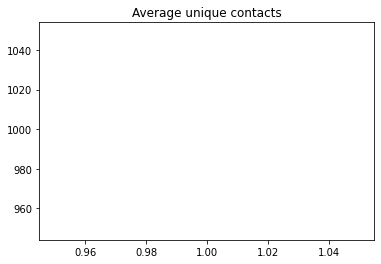

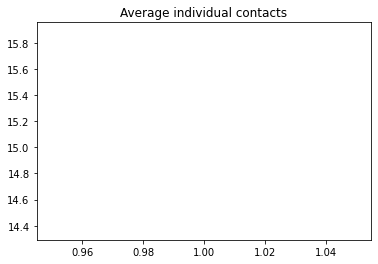

In [ ]:


iter_graph("Average unique contacts",l_p_t)
iter_graph("Average individual contacts",avg_contacts_pop_l)

In [ ]:
l_p_t_n = [l_p_t - np.mean(l_p_t) for x in l_p_t]/np.std(l_p_t)

print(np.mean(l_p_t_n))
print(np.std(l_p_t_n))


nan
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
print("Average contacts less than 2 m:", np.average(np.array(l_c_t)))
print("Average unique individuals at leas than 2 m", np.average(np.array(l_p_t)))
print("Average max contacts:", np.average(np.array(l_max)))

Average contacts less than 2 m: 7562.0
Average unique individuals at leas than 2 m 999.0
Average max contacts: 24.0


In [ ]:
import dill                            #pip install dill --user
filename = 'globalsave_1000_1000_cir.pkl'
dill.dump_session(filename)

# and to load the session again:
#dill.load_session(filename)

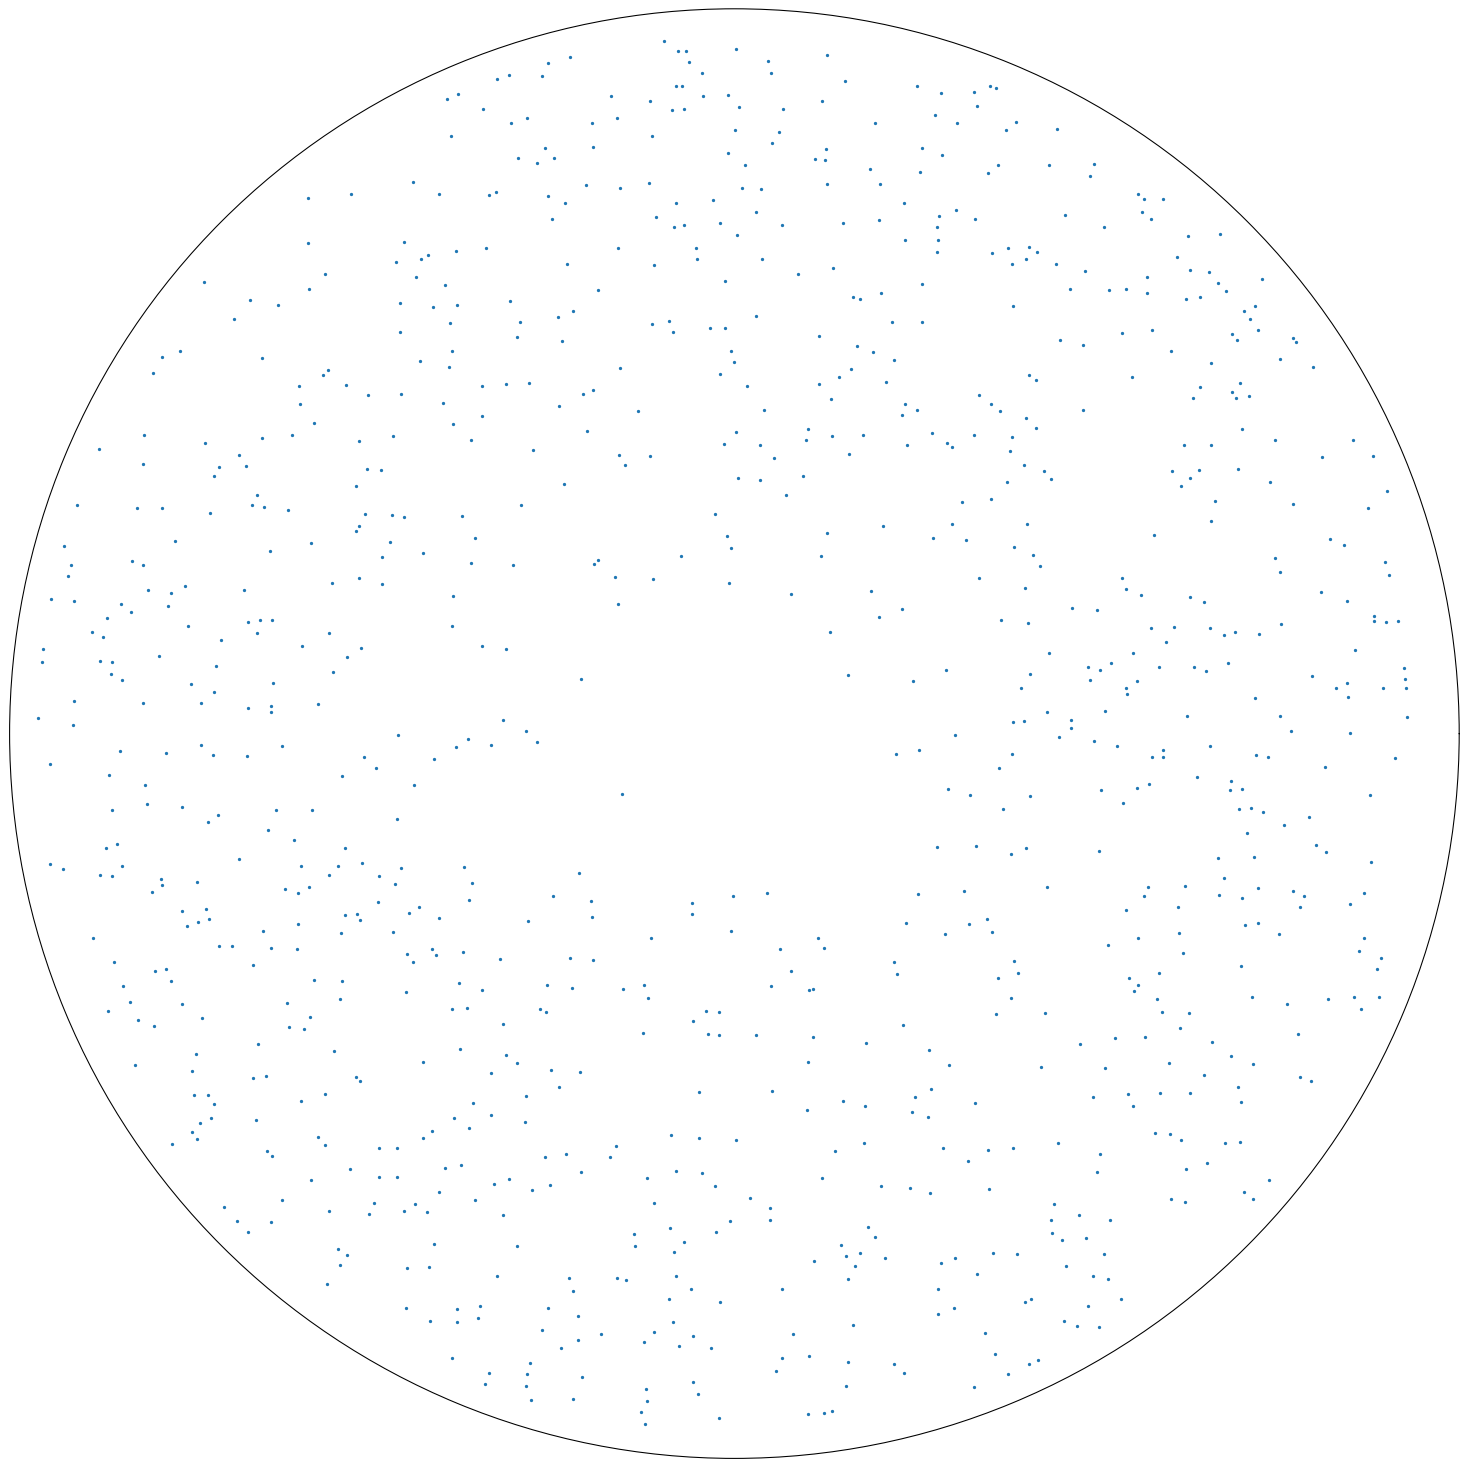

In [ ]:
l_r = np.array(l_r)
l_t = np.array(l_t)

polar_graph(dh*5,l_r,l_t)

In [ ]:
np.sum(contacts)/pop

10.6182

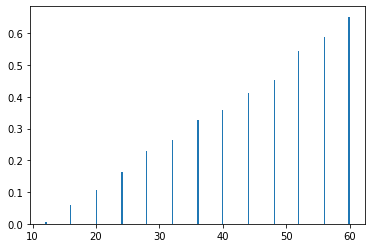

In [ ]:
import matplotlib.pyplot as plt
ll = np.ceil(np.ceil(np.random.triangular(10,60, 60, 10000))/4)*4
h = plt.hist(ll, bins=200,density=True)
plt.show()

In [ ]:
np.floor(np.ceil(np.random.triangular(10,60, 60, 1000))/4)*4

array([56., 40., 48., 48., 12., 36., 28., 48., 40., 52., 48., 36., 36.,
       56., 56., 32., 56., 56., 52., 48., 20., 32., 52., 28., 12., 36.,
       36., 56., 48., 40., 44., 16., 60., 40., 52., 56., 32., 40., 48.,
       44., 52., 40., 32., 56., 40., 56., 56., 44., 56., 16., 56., 48.,
       24., 56., 48., 56., 48., 56., 36., 48., 48., 52., 48., 48., 24.,
       40., 28., 52., 24., 52., 40., 52., 56., 56., 36., 56., 44., 48.,
       12.,  8., 48., 56., 52., 52., 16., 48., 48., 48., 44., 52., 52.,
       44., 44., 36., 32., 48., 32., 32., 56., 52., 44., 48., 40., 16.,
       28., 28., 48., 36., 52., 52., 36., 40., 44., 48., 56., 44., 48.,
       32., 40., 52., 36., 20., 28., 28., 24., 60., 28., 48., 52., 44.,
       36., 36., 56., 16., 52., 40., 48., 44., 52., 40., 36., 36., 40.,
       56., 32., 56., 44., 20., 60., 56., 32., 44., 56., 20., 40., 24.,
       40., 48., 56., 32., 44., 48., 56., 16., 28., 48., 52., 32., 40.,
       36., 32., 48., 48., 56., 56., 48., 36., 40., 28., 32., 56

In [ ]:
randTri = (np.random.triangular(10,60, 60, 10))
print((randTri/4).astype(int)*4)

[56 28 32 52 40 44 44 56 32 20]


In [ ]:
np.average(np.array(l_d))

59.7258538662112

In [ ]:
c_total

7

In [ ]:
new = []

if new:
  print('h')

In [ ]:
l=[]
l.append([r.uniform(rmin,rmax),r.uniform(tmin,tmax)])
l_r = [l[0][0]]
l_t = [l[0][1]]
l

[[27.413111706998386, 2.7610534888368714]]

In [ ]:
l_t

[126.75672867962243]

In [ ]:

length = 1

coord_r = np.random.rand(length)*10
coord_alpha = np.random.rand(length)*np.pi


[[0.]]


In [ ]:
a = [1,2,3]
b = [4,5]
b.append(a)
b

[4, 5, [1, 2, 3]]

In [ ]:
def dist2(r1,r2,t1,t2):
  return np.sqrt(r1**2 + r2**2 - 2*r1*r2*np.cos(t1 - t2))

In [ ]:
dist([1,0],[1,np.pi/2])

1.414213562373095

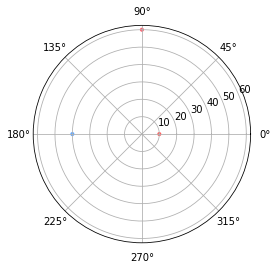

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Compute areas and colors
N = 5
l_r = np.array([10,60,40])
l_t = np.array([0,np.pi/2,np.pi])
area = 10
colors = l_r*100

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(l_t, l_r, c=colors, s=area, cmap='hsv', alpha=0.5)

In [ ]:
r 

[10, 60, 40]